Survival Analysis Explained
===

This notebook demonstrates the code examples from this [article](https://tobeadatascientist.substack.com/p/gentle-introduction-to-hugging-face-transformers), showcasing the before and after of each technique.

For more resources like this, visit [tobeadatascientist.com](https://tobeadatascientist.com)

# Import

In [3]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=41494f248847f4a01a0d12abd32a3ab6a340e9f20d731ced838d0298085b4052
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Example 1: Time to Churn after Signup

In [5]:
data = pd.DataFrame({
    'user_id': range(1, 11),
    'days_active': [5, 12, 7, 20, 30, 25, 8, 16, 10, 14],
    'churned':     [1, 1, 0, 1, 0, 1, 1, 0, 1, 1]  # 0 = still active (censored), 1 = churned
})

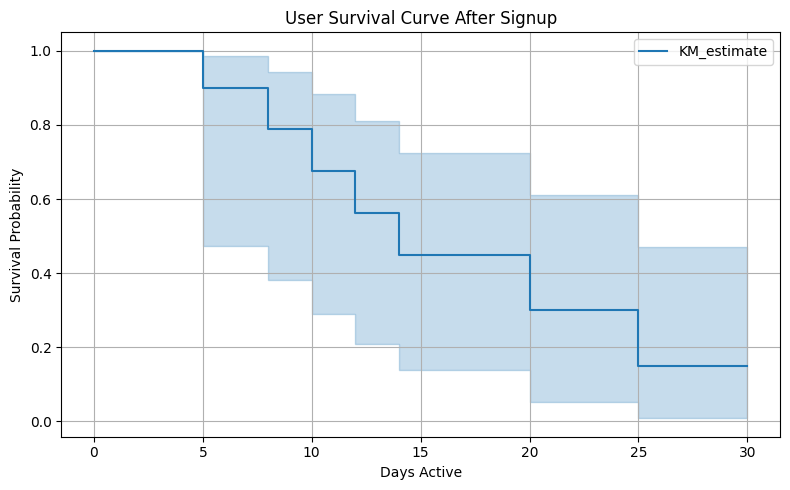

In [7]:


kmf = KaplanMeierFitter()
kmf.fit(durations=data['days_active'], event_observed=data['churned'])

plt.figure(figsize=(8, 5))
kmf.plot_survival_function()
plt.title('User Survival Curve After Signup')
plt.xlabel('Days Active')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.tight_layout()
plt.show()


# Example 2: Time to Churn after Signup (per Platform)

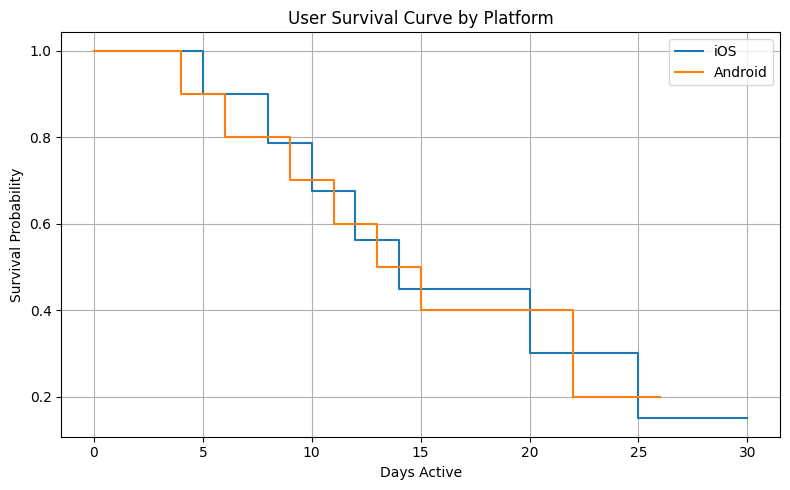

In [8]:
# Sample data
data = pd.DataFrame({
    'user_id': range(1, 21),
    'days_active': [5, 12, 7, 20, 30, 25, 8, 16, 10, 14, 9, 22, 18, 4, 26, 11, 6, 19, 13, 15],
    'churned':     [1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1],
    'platform':    ['iOS'] * 10 + ['Android'] * 10
})

# Initialize estimator
kmf = KaplanMeierFitter()

# Plot survival functions for each platform
plt.figure(figsize=(8, 5))
for platform in data['platform'].unique():
    subset = data[data['platform'] == platform]
    kmf.fit(durations=subset['days_active'], event_observed=subset['churned'], label=platform)
    kmf.plot_survival_function(ci_show=False)

plt.title('User Survival Curve by Platform')
plt.xlabel('Days Active')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.tight_layout()
plt.show()


# Example 3: Telco Customer Churn

In [11]:
# Load Telco churn data
# Kaggle URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
df = pd.read_csv('https://raw.githubusercontent.com/andresvourakis/tbds-demos/refs/heads/main/survival-analysis-explained/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [12]:
# Prepare survival data
df['event'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['duration'] = df['tenure']  # months active


In [13]:
# Fit KM estimator
kmf = KaplanMeierFitter()
kmf.fit(df['duration'], event_observed=df['event'], label='Telco Customers')

<lifelines.KaplanMeierFitter:"Telco Customers", fitted with 7043 total observations, 5174 right-censored observations>

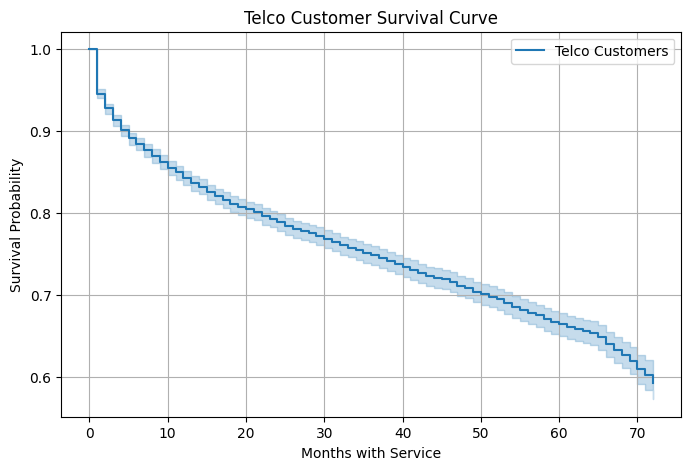

In [14]:
# Plot survival curve
plt.figure(figsize=(8,5))
kmf.plot_survival_function(ci_show=True)
plt.title('Telco Customer Survival Curve')
plt.xlabel('Months with Service')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()